In [1]:
import folium
import openrouteservice as ors
import math

postcode = "LS9 0BT"
response = client.pelias_search(text=postcode, focus_point=[53, -1])

In [2]:
api_key = '5b3ce3597851110001cf6248f7b397efa34d4ff7bc170e361ff89f0b'

### steps

1. import and save Map data of Leeds City
2. select a postcode
3. find the potholes in this postcode, put markers on the folium-map for every pothole
4. randomly select any 1 as a starting point, and plan the path to all potholes using 'n' vehicles
5. set time for each job, and repeat step 4.
6. for steps 4 and 5, generate output with path-lengths, and time to travel it.
7. if pothole-size is available, add it to the logic.
8. generate data visualisation charts for the output generated in step 6.

In [3]:
m = folium.Map(location=[53.789386682283094, -1.5176446891452429], tiles="cartodbpositron", zoom_start=15)
folium.Marker(location=[53.789386682283094, -1.5176446891452429], popup='LS9 0BT').add_to(m)
m

In [4]:
# find coordinates to a selected postcode using pelias_search geocoding
postcode = 'LS9 0BT'

# coordinates for postcode 'LS9 0BT'
start_coords = (53.789386682283094, -1.5176446891452429)

# folium.Marker(location=start_coords, popup=postcode).add_to(m)

In [5]:
# potholes data sample

pothole_data = {
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "properties": {
        "defect": "pothole",
        "dim": "1x0.5x0.2"
      },
      "geometry": {
        "coordinates": [
          -1.5202653014356144,
          53.78860942921949
        ],
        "type": "Point"
      },
      "id": 0
    },
    {
      "type": "Feature",
      "properties": {
        "defect": "pothole",
        "dim": "0.5x1.2x0.2"
      },
      "geometry": {
        "coordinates": [
          -1.5185276122489597,
          53.78845734482039
        ],
        "type": "Point"
      },
      "id": 1
    },
    {
      "type": "Feature",
      "properties": {
        "defect": "pothole",
        "dim": "0.5x1.2x0.2"
      },
      "geometry": {
        "coordinates": [
          -1.5181200061435902,
          53.7886537870655
        ],
        "type": "Point"
      },
      "id": 2
    },
    {
      "type": "Feature",
      "properties": {
        "defect": "pothole",
        "dim": "1x0.5x0.2"
      },
      "geometry": {
        "coordinates": [
          -1.516536749999375,
          53.78941719738333
        ],
        "type": "Point"
      },
      "id": 3
    },
    {
      "type": "Feature",
      "properties": {
        "defect": "pothole",
        "dim": "1x0.5x0.2"
      },
      "geometry": {
        "coordinates": [
          -1.515893722095484,
          53.7902010524229
        ],
        "type": "Point"
      },
      "id": 4
    },
    {
      "type": "Feature",
      "properties": {
        "defect": "pothole",
        "dim": "1x0.5x0.2"
      },
      "geometry": {
        "coordinates": [
          -1.5157207769570675,
          53.79012401470595
        ],
        "type": "Point"
      },
      "id": 5
    },
    {
      "type": "Feature",
      "properties": {
        "defect": "pothole",
        "dim": "1x0.5x0.2"
      },
      "geometry": {
        "coordinates": [
          -1.5150777490531766,
          53.789720028964695
        ],
        "type": "Point"
      },
      "id": 6
    },
    {
      "type": "Feature",
      "properties": {
        "defect": "pothole",
        "dim": "1x0.5x0.2"
      },
      "geometry": {
        "coordinates": [
          -1.5165475271180355,
          53.79008783703668
        ],
        "type": "Point"
      },
      "id": 7
    },
    {
      "type": "Feature",
      "properties": {
        "defect": "pothole",
        "dim": "1x0.5x0.2"
      },
      "geometry": {
        "coordinates": [
          -1.5178539965092739,
          53.78843569024261
        ],
        "type": "Point"
      },
      "id": 8
    }
  ]
}

In [6]:
# find potholes in this area and extract coodinates

coords = []
for feature in pothole_data['features']:
    if feature['properties']['defect'] == 'pothole':
        defect_vol = list(map(float, feature['properties']['dim'].split('x')))
        # print(defect_vol)
        eta = defect_vol[0]*defect_vol[1]*defect_vol[2] * 10 / 20 * 3600 # eta = ((vol * 10)kg / 20kg/trip * 3600sec) .... more qty --> more time
        coords.append({'location': feature['geometry']['coordinates'], 'service': eta})
# print(coords)

# visualize the points on map
for coord in coords:
    folium.Marker(location=list(reversed(coord['location']))).add_to(m)
m

In [7]:
# start from starting point, find routes for 'n' vehicles.

client = ors.Client(key=api_key)

# coords = [
#     {'location':[-1.5202653014356144, 53.78860942921949], 'service': 1*60*60},
#     {'location':[-1.5185276122489597, 53.78845734482039], 'service': 1*60*60},
#     {'location':[-1.5181200061435902, 53.78865378706550], 'service': 1*60*60},
#     {'location':[-1.5165367499993750, 53.78941719738333], 'service': 1*60*60},
#     {'location':[-1.5158937220954840, 53.79020105242290], 'service': 1*60*60},
#     {'location':[-1.5157207769570675, 53.79012401470595], 'service': 1*60*60},
#     {'location':[-1.5150777490531766, 53.78972002896469], 'service': 1*60*60},
#     {'location':[-1.5165475271180355, 53.79008783703668], 'service': 1*60*60},
#     {'location':[-1.5178539965092739, 53.78843569024261], 'service': 1*60*60}
# ]

vehicles = [
    ors.optimization.Vehicle(id=0, profile='driving-car', start=list(reversed(start_coords)), time_window=[0, 2*60*60]), #, end=vehicle_start, capacity=[5]),
    ors.optimization.Vehicle(id=1, profile='driving-car', start=list(reversed(start_coords)), time_window=[0, 4*60*60]), #, end=vehicle_start, capacity=[5]),
    ors.optimization.Vehicle(id=2, profile='driving-car', start=list(reversed(start_coords)), time_window=[0, 4*60*60])  #, end=vehicle_start, capacity=[5])
]
jobs = [ors.optimization.Job(id=index, **job) for index, job in enumerate(coords)]

optimized = client.optimization(jobs=jobs, vehicles=vehicles, geometry=True)

line_colors = ['orange', 'blue', 'green', 'pink', 'yellow']

for route in optimized['routes']:
    folium.PolyLine(locations=[list(reversed(coords)) for coords in ors.convert.decode_polyline(route['geometry'])['coordinates']], weight=2*(5-route['vehicle']), color=line_colors[route['vehicle']]).add_to(m)
    
    for step in route['steps']:
        if not step['type'] == 'job':
            continue
        folium.Marker(location=list(reversed(step['location'])), popup=f"Arrival time: {math.floor(step['arrival'] / (60*60))} hours {math.floor((step['arrival'] % (60*60)) / 60)} minutes", icon=folium.Icon(color=line_colors[route['vehicle']])).add_to(m)
m

In [8]:
import pandas as pd

# Extracting details
vehicle_details = []

for route in optimized['routes']:
    vehicle_id = route['vehicle']
    for step in route['steps']:
        if step['type'] == 'job':
            job_id = step['job']
            location = step['location']
            arrival_time = step['arrival']
            hours = math.floor(arrival_time / (60*60))
            minutes = math.floor((arrival_time % (60*60)) / 60)
            vehicle_details.append({
                'Vehicle ID': vehicle_id,
                'Job ID': job_id,
                'Location': location,
                'Arrival Time': f"{hours} hours {minutes} minutes"
            })

# Create a DataFrame
df = pd.DataFrame(vehicle_details)
df

,Vehicle ID,Job ID,Location,Arrival Time
0,0,2,"[-1.5181200061435902, 53.7886537870655]",0 hours 0 minutes
1,0,1,"[-1.5185276122489595, 53.78845734482039]",0 hours 3 minutes
2,0,8,"[-1.517853996509274, 53.78843569024261]",0 hours 7 minutes
3,0,0,"[-1.5202653014356144, 53.78860942921949]",0 hours 12 minutes
4,1,6,"[-1.5150777490531766, 53.789720028964695]",0 hours 0 minutes
5,1,5,"[-1.5157207769570675, 53.79012401470595]",0 hours 4 minutes
6,1,4,"[-1.515893722095484, 53.7902010524229]",0 hours 7 minutes
7,1,7,"[-1.5165475271180355, 53.79008783703668]",0 hours 10 minutes
8,1,3,"[-1.516536749999375, 53.78941719738333]",0 hours 13 minutes


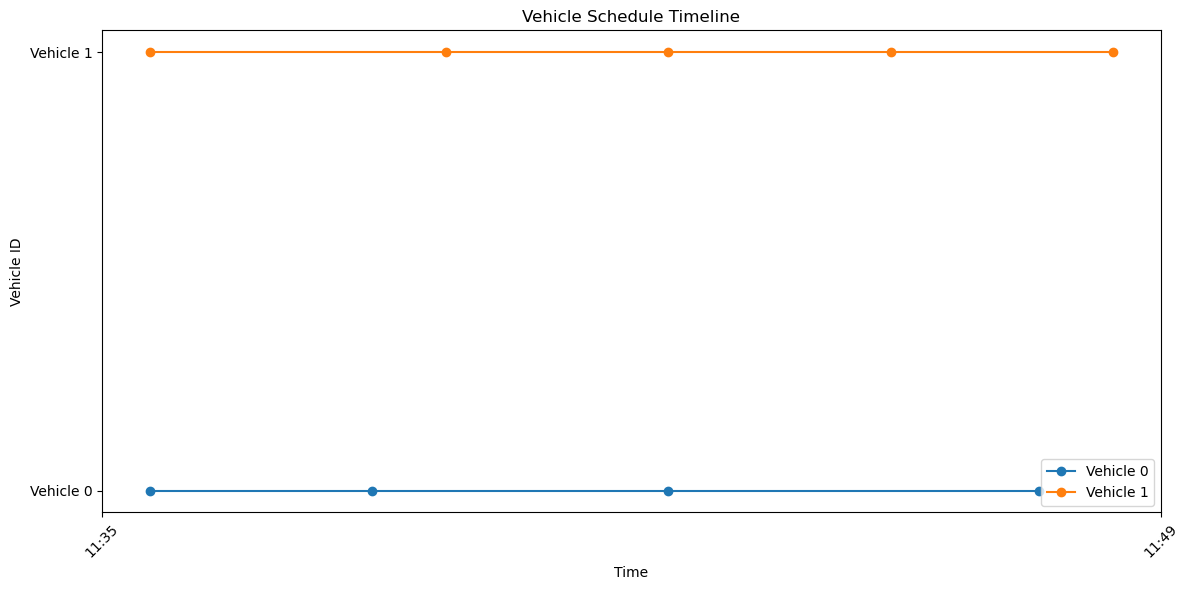

In [9]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

# Convert arrival times to datetime objects for plotting
for i in range(len(vehicle_details)):
    h, m = map(int, vehicle_details[i]['Arrival Time'].split(' ')[::2])
    vehicle_details[i]['Arrival Datetime'] = datetime.now() + timedelta(hours=h, minutes=m) # starting right now

df = pd.DataFrame(vehicle_details)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

for vehicle_id in set(df['Vehicle ID']):
    vehicle_data = df[df['Vehicle ID'] == vehicle_id]
    times = vehicle_data['Arrival Datetime']
    ax.plot(times, [vehicle_id] * len(times), '-o', label=f'Vehicle {vehicle_id}')

ax.xaxis.set_major_locator(mdates.HourLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.xticks(rotation=45)
plt.yticks(range(len(set(df['Vehicle ID']))), [f'Vehicle {v_id}' for v_id in sorted(set(df['Vehicle ID']))])
plt.xlabel('Time')
plt.ylabel('Vehicle ID')
plt.title('Vehicle Schedule Timeline')
plt.legend()
plt.tight_layout()
plt.show()

### extras

In [ ]:
# with open('pothole_data.json') as f:
#   data = json.load(f)

start_coords = (53.794474, -1.542677) # coordinates for postcode 'LS9 0BT'

# Extract pothole coordinates
pothole_coords = []
for feature in pothole_data['features']:
  if feature['properties']['defect'] == 'pothole':
    pothole_coords.append(feature['geometry']['coordinates'])

# Create m centered on start location
m = folium.Map(location=start_coords, zoom_start=15)

# Plot start location
folium.Marker(location=start_coords, popup='Start').add_to(m)  

# Plot pothole locations
for coords in pothole_coords:
  folium.CircleMarker(location=coords, radius=3, color='red', fill=True).add_to(m)

# Create routes for 2 vehicles avoiding potholes
for i in range(2):
  
  route = folium.PolyLine(locations=[start_coords], weight=5, color='blue')
  
  current = start_coords
  
  for next_coords in pothole_coords:
    if next_coords not in route.locations:
      route.add_child(folium.PolyLine(locations=[current, next_coords], weight=1, color='blue'))
      current = next_coords

  route.add_to(m)

m

In [3]:
m.show_in_browser()

Your map should have been opened in your browser automatically.
Press ctrl+c to return.


# New attempt

In [12]:
from openrouteservice.optimization import Vehicle, Job

class FleetManager:
    def __init__(self, bot_count, start):
        self.id = id
        self.start = start
        self.bot_count = 0
        self.bots = self.create_bots(bot_count)

    def create_bots(self, n):
        bots = []
        for i in range(n):
            bots.append(self.create_bot(id=i))
        return bots

    def create_bot(self, id):
        # TODO add bot features - capacity, skills, etc.
        b = Vehicle(id=id, 
                    start=self.start,
                    end=self.start,
                    capacity=[1000]) # capacity = material in kg
        self.bot_count += 1
        return b

    def destroy_bot(self, id):
        for bot in self.bots:
            if bot.id == id:
                # check that the bot/vehicle is free
                # if bot is not assigned:
                if True:
                    self.bots.remove(bot)
                    self.bot_count -= 1
                    # logger.INFO('bot with id =', id, 'removed')
                else:
                    # logger.INFO('bot is on a job')
                    pass

    def get_bot_count(self):
        return self.bot_count

    pass

In [13]:
class Utils:
    def __init__(self):
        pass

    def calculate_volume(self, defect):
        # assume all values in m
        l, b, h = map(float, defect['properties']['dim'].split('x'))
        return l * b * h

    def calculate_area(self, defect):
        # assume all values in m
        l, b, h = map(float, defect['properties']['dim'].split('x'))
        return l * b

    def calculate_qty_reqd(self, volume):
        # assume return value in kg
        # assume density = 2400 kg/m3 (usually 2200 - 2400)
        density = 2400
        return volume * density
    
    def calculate_eta(self, defect):
        # repairing a pothole involves 
        vol = self.calculate_volume(defect)
        area = self.calculate_area(defect)

        # qty_reqd
        qty_reqd = self.calculate_qty_reqd(vol)

        setup_time = 0
        if defect['properties']['defect'] == 'crack':
            setup_time = 300
        elif defect['properties']['defect'] == 'pothole':
            setup_time = 600
        elif defect['properties']['defect'] == 'dent':
            setup_time = 1200
        else:
            # TODO add logger
            # logger.INFO('invalid defect type:', defect['properties']['defect'])
            pass
        
        # assume vol*5*60 + area*2*60
        # all time values in s
        service_time = (vol * 300) + (area * 120) * 10
        
        return vol, area, qty_reqd, setup_time, service_time
    
    def divide_jobs():
        pass


In [14]:
API_KEY = '5b3ce3597851110001cf6248f7b397efa34d4ff7bc170e361ff89f0b'

In [15]:
import openrouteservice as ors
import pandas as pd
import folium
from folium.plugins import BeautifyIcon

# import utils
# import fleet_manager as fm
# import constants

# input postcode # assume it is valid
# TODO replace hard-coded values with user input
# postcode = input()
postcode = 'LS9 0BT'

# input 'n'
# bot_count = int(input())
bot_count = 3

# customise? input
# customise = bool(input())
customise = False

# create client
client = ors.Client(API_KEY)

# find the postcode coordinates
station = client.pelias_search(text=postcode)
station_coords = station['features'][0]['geometry']['coordinates']

m = folium.Map(location=list(reversed(station_coords)), tiles='cartodbpositron', zoom_start=17)
# TODO create & add marker for station_coords

# each app instance shall have only 1 FM.
# # create fleet managers (multiple to provide options)
# for i in range(len(fleet_options)):
#     fleets[i] = FleetManager(id=i, bot_count=bot_count)

# create fleet and create 'n' bots
fleet = FleetManager(bot_count=bot_count, start=station_coords)

# get potholes data
potholes_data = pd.read_json('./data/LS90BT_potholes_small.json')
# TODO logic to select only those potholes lying in a vicinity

# TODO logic to select only road-defects from a database of multiple notes/landmarks/items; and create markers for them (along with tooltips having estimates).


In [16]:
station_coords

[-1.517644, 53.789386]

In [17]:
m

In [23]:
# indent = 1

# calculate estimates and # create jobs
ut = Utils()
pothole_estimates = [] # vol, surface_area, qty_reqd, setup_time, service_time

jobs = []
for feature in potholes_data['features']:
    volume, surface_area, qty_reqd, setup_time, service_time = ut.calculate_eta(feature)
    pothole_estimates.append({
        'id': feature['id'], 
        'defect': feature['properties']['defect'], 
        'volume': volume, 
        'surface_area': surface_area, 
        'qty_reqd': qty_reqd, 
        'setup_time': setup_time, 
        'service_time': service_time})
    jobs.append(ors.optimization.Job(
        location=feature['geometry']['coordinates'], 
        id=feature['id'], 
        setup=setup_time, 
        service=service_time, 
        amount=[qty_reqd])
        )

[(job.id, job.location) for job in jobs], pothole_estimates

([(0, [-1.520265301435614, 53.78860942921949]),
  (1, [-1.518527612248959, 53.78845734482039]),
  (2, [-1.51812000614359, 53.7886537870655]),
  (3, [-1.516536749999375, 53.78941719738333]),
  (4, [-1.515893722095484, 53.7902010524229]),
  (5, [-1.515720776957067, 53.79012401470595]),
  (6, [-1.515077749053176, 53.789720028964695]),
  (7, [-1.516547527118035, 53.79008783703668]),
  (8, [-1.517853996509273, 53.78843569024261])],
 [{'id': 0,
   'defect': 'pothole',
   'volume': 0.1,
   'surface_area': 0.5,
   'qty_reqd': 240.0,
   'setup_time': 600,
   'service_time': 630.0},
  {'id': 1,
   'defect': 'pothole',
   'volume': 0.12,
   'surface_area': 0.6,
   'qty_reqd': 288.0,
   'setup_time': 600,
   'service_time': 756.0},
  {'id': 2,
   'defect': 'pothole',
   'volume': 0.12,
   'surface_area': 0.6,
   'qty_reqd': 288.0,
   'setup_time': 600,
   'service_time': 756.0},
  {'id': 3,
   'defect': 'pothole',
   'volume': 0.1,
   'surface_area': 0.5,
   'qty_reqd': 240.0,
   'setup_time': 600

In [24]:
# Plot the locations on the map with more info in the ToolTip
for feature in potholes_data['features']:
    # defect_type, defect_vol = eval_defect_info(feature)
    # if defect_type == 'pothole':
    tooltip = folium.map.Tooltip("<h4><b>ID {}</b></p><p>Defect: {}</p><p>Supplies needed: <b>{}kg</b></p>".format(feature['id'], feature['properties']['defect'], ut.calculate_qty_reqd(ut.calculate_volume(feature))))

    folium.Marker(
        location=list(reversed(feature['geometry']['coordinates'])),
        tooltip=tooltip,
        icon=BeautifyIcon(
            icon_shape='marker',
            number=int(feature['id']),
            spin=True,
            text_color='brown',
            background_color="#FFF",
            inner_icon_style="font-size:12px;padding-top:-5px;"
        )
    ).add_to(m)

# The vehicles are all located at the station
station_coords = station_coords

folium.Marker(
    location=list(reversed(station_coords)),
    icon=folium.Icon(color="green", icon="charging-station", prefix='fa'),
    tooltip='<b>LS90BT station</b>',
    setZIndexOffset=1000
).add_to(m)

m

In [25]:
# indent = 1

# plan route using ORS
route_plan = ors.optimization.optimization(client,
                                jobs=jobs,
                                vehicles=fleet.bots,
                                shipments=None,
                                matrix=None,
                                geometry=True,
                                dry_run=None)

route_plan

{'code': 0,
 'summary': {'cost': 452,
  'routes': 3,
  'unassigned': 0,
  'delivery': [2376],
  'amount': [2376],
  'pickup': [0],
  'setup': 0,
  'service': 6537,
  'duration': 452,
  'waiting_time': 0,
  'priority': 0,
  'distance': 2432,
  'violations': [],
  'computing_times': {'loading': 81, 'solving': 48, 'routing': 40}},
 'unassigned': [],
 'routes': [{'vehicle': 0,
   'cost': 133,
   'delivery': [960],
   'amount': [960],
   'pickup': [0],
   'setup': 0,
   'service': 2520,
   'duration': 133,
   'waiting_time': 0,
   'priority': 0,
   'distance': 716,
   'steps': [{'type': 'start',
     'location': [-1.517644, 53.789386],
     'setup': 0,
     'service': 0,
     'waiting_time': 0,
     'load': [960],
     'arrival': 0,
     'duration': 0,
     'violations': [],
     'distance': 0},
    {'type': 'job',
     'location': [-1.515077749053176, 53.789720028964695],
     'id': 6,
     'setup': 0,
     'service': 630,
     'waiting_time': 0,
     'job': 6,
     'load': [720],
     'ar

In [26]:
# plot maps, charts, comparisons
for pothole in potholes_data['features']:
    folium.Marker(
        location=pothole['geometry']['coordinates'],
        tooltip=pothole['id'],
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(m)

m

In [30]:
colours = ['red', 'blue', 'black', 'green', 'yellow', 'orange']

In [31]:
for idx, route in enumerate(route_plan['routes']):
    folium.PolyLine(
        locations=ors.convert.decode_polyline(route['geometry'])['coordinates'], 
        popup="<b>Vehicle: {}</b>".format(route['vehicle']),
        color=colours[idx]).add_to(m)

m

In [27]:
for route in route_plan['routes']:
    folium.PolyLine(locations=route['geometry']['coordinates'], weight=5, color='blue').add_to(m)

# m.save('potholes_map.html')
# conclude w/ report

m

TypeError: string indices must be integers, not 'str'